# Hyun-Joon Yang
# yanghyun@usc.edu
# BISC 481
# HW 4

In [1]:
from IPython.display import Image
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
.output_jpeg {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
.center {
    text-align: center;
    margin: auto;
}
</style>
""")

In [2]:
import numpy as np

<hr>

## 1)	Sequence similarity: The BLOSUM-62 scoring matrix  (see chapter 5.7) (10pts)

### a)	How is the substitution likelihood ratio (Lij) defined for substitution of residue i with residue j? (Briefly describe the ratio).

$$ L_{ij} = \frac{\mbox{frequency of an i-j substitution in the alignment block of related proteins}}{\mbox{frequency of an i-j substitution in the same block, but with the positions of all the amino acids scrambled randomly}} $$

### b)	How to calculate the substitution score Sij from the likelihood ratio Lij? 

$$ S_{ij} = 2\log_2{L_{ij}} $$

### c) Two different sequences are compared to the sequence RFYTLDV. Which of the two sequences is more closely related to RFYTLDV? Calculate the aggregate score S and likelihood L for the two alignments. Use the BLOSUM-62 substitution matrix (Fig. 1) for the scoring. Show your calculations below.

$ S_{total} = \sum_{i=1,j=1}^{N}{S_{ij}} $ <br>
$ L_{total} = 2^{\frac{S_{total}}{2}} $

Alignment 1: <br>
RFYTLDV <br>
KYHSIEI <br>

$ S_{total} = S_{RK} + S_{FY} + S_{YH} + S_{TS} + S_{LI} + S_{DE} + S_{VI} $ <br>
$ S_{total} = 2 + 3 + 2 + 1 + 2 + 2 + 3 = 15 $ <br>
$ L_{total} = 2^{15/2} = 181.02 $ <br>

Alignment 2: <br> 
RFYTLDV <br>
RPGWDKV <br>

$ S_{total} = S_{RR} + S_{FP} + S_{YG} + S_{TW} + S_{LD} + S_{DK} + S_{VV} $ <br>
$ S_{total} = 5 - 4 - 3 - 2 - 4 - 1 + 4 = -5 $ <br>
$ L_{total} = 2^{-5/2} = 0.177 $ <br>

KYHSIEI is more closely related.

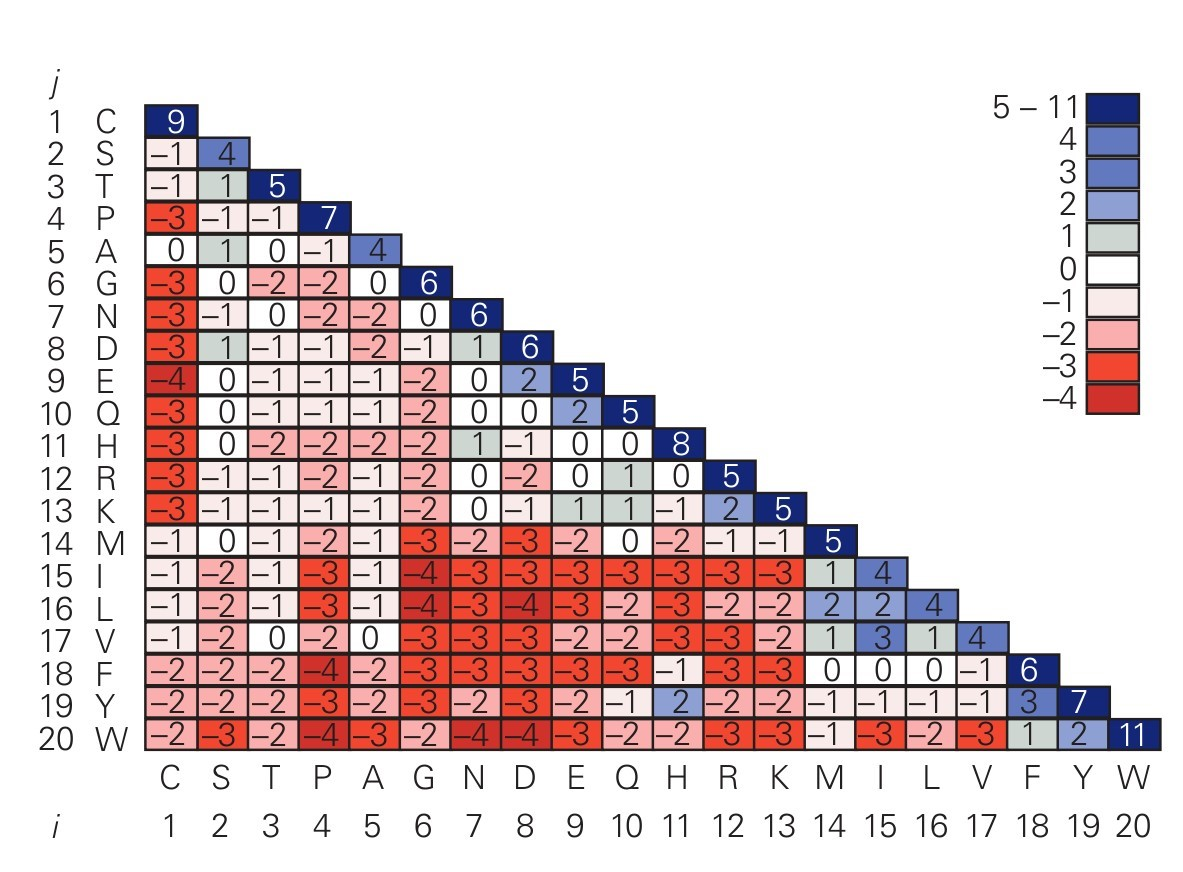

In [3]:
Image('img1.jpg', width=500)

<hr>

## 2)	Protein structure motifs  (see chapter 4C) (10 pts)

A structural motif is a simple combination of a few secondary structure elements with a specific geometric arrangement that have been found to occur frequently in proteins.  

### a)	What biological function is often associated with the helix-loop-helix motif?  

Binding of Calcium ions

### b)	Give examples of 2 other frequently found structural motifs.   

* Greek key motif
* $\beta$-$\alpha$-$\beta$ motif

### c)	When alpha-helices are packed in a protein (e.g. myoglobin), why are some angles between interacting helices more favorable than others? What is the underlying model to explain this observation? 

Certain angles allow for fitting ridges of one helix into grooves of another according to the ridge-groove model.

<hr>

## 3)	Structure comparison (see chapter 5.14) (15 pts)

### a)	How to calculate the root mean square deviation (RMSD) between two proteins?  

$$ RMSD(A,B) = \sqrt{\frac{1}{N}\sum_{i=1}^{N}{d(a_i,b_i)^2}} $$
$$ \mbox{where N is number of atoms, d is distance between 2 atoms} $$

### b)	Two proteins A and B are aligned. Calculate the static RMSD between the $C\alpha$ atoms of the four residues in A and B, coordinates for which are shown the tables below. You can write a little script in your favorite programming language (Python, Matlab, etc.), then include the code of the script below. Or do it using a calculator – show your calculations below. 

 The coordinates of the aligned point sets A-B-C and A’-B’-C’ are: 

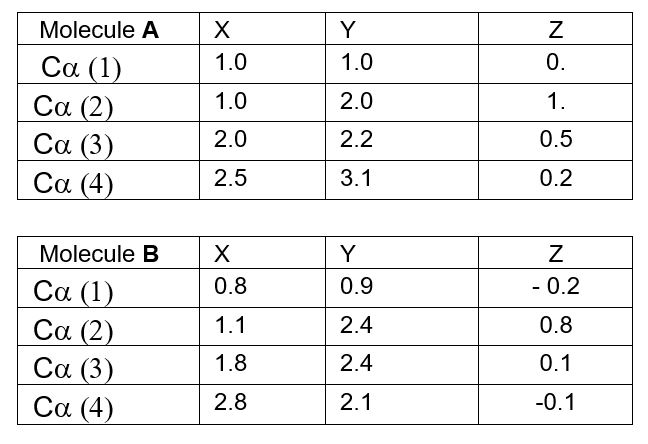

In [4]:
Image('img2.jpg', width=300)

In [5]:
def getDist(A, B):
    '''
    gets the distance between 2 molecules
    :param A: N x 3 matrix of coordinates for molecule A
    :param B: N x 3 matrix of coordinates for molecule B
    :returns: N size vector of distance
    '''
    assert A.shape == B.shape
    return np.sqrt(np.sum(np.square(B-A), axis=1))

In [6]:
def RMSD(A, B):
    """
    gets the RMSD of 2 molecules
    :param A: N x 3 matrix of coordinates for molecule A
    :param B: N x 3 matrix of coordinates for molecule B
    :returns: RMSD value
    """
    N = A.shape[0]
    return np.sqrt((1/N) * np.sum(np.power(getDist(A,B),2)))

In [7]:
A = np.array([
    [1, 1, 0],
    [1, 2, 1],
    [2, 2.2, 0.5],
    [2.5, 3.1, 0.2]
])
B = np.array([
    [0.8, 0.9, -0.2],
    [1.1, 2.4, 0.8],
    [1.8, 2.4, 0.1],
    [2.8, 2.1, -0.1]
])

In [8]:
RMSD(A, B)

0.6557438524302

<hr>

## 4)	Sequence and structure alignment (15 pts)

Using PDB server (see below), perform sequence and structure alignments of three proteins domains. 

1. Myoglobin from whale (PDB-ID: 1MBC)
2. Hemoglobin alpha chain from pig (PDB-ID: 2PGH) 
3. Colicin A (PDB-ID: 1COL) 

All three protein domains are part of the globin-like fold (i.e. the same “topology” in the CATH category). Myoglobin and hemoglobin are oxygen binding proteins that both contain a heme group. In contrast, colicin is a pore-forming domain in an antibacterial protein from E.coli without a heme group. 


### a)	Perform a sequence alignment between 1MBC and 2PGH using the  Needleman-Wunsch alignment method. What are the sequence identity and similarity between 1MBC and 2PGH? 

* Identities: 43/159, i.e., 28.10 % (query) and 30.50 % (subject) 
* Similars:   66/159, i.e., 43.14 % (query) and 46.81 % (subject) 

### b)	Perform a structure alignment between 1MBC and 1COL using the jFATCAT rigid alignment method. What is the RMSD value in the optimal alignment and what is the sequence identity/similarity between 1MBC and 1COL in the alignment below? 

* RMSD: 3.60
* SeqID: 8%
* SeqSim: 18%

### c)	Would you expect that the protein 1COL belongs to the same CATH superfamily as 1MBC and 2PGH? 

I would expect 1COL to not belong to the same CATH superfamily as there is low sequence identity between 1MBC and 1 COL whereas there is a relatively high RMSD (you would expect similar structures to have RMSD to be under 3 angstroms).

### Include a snapshot of superimposed proteins here.

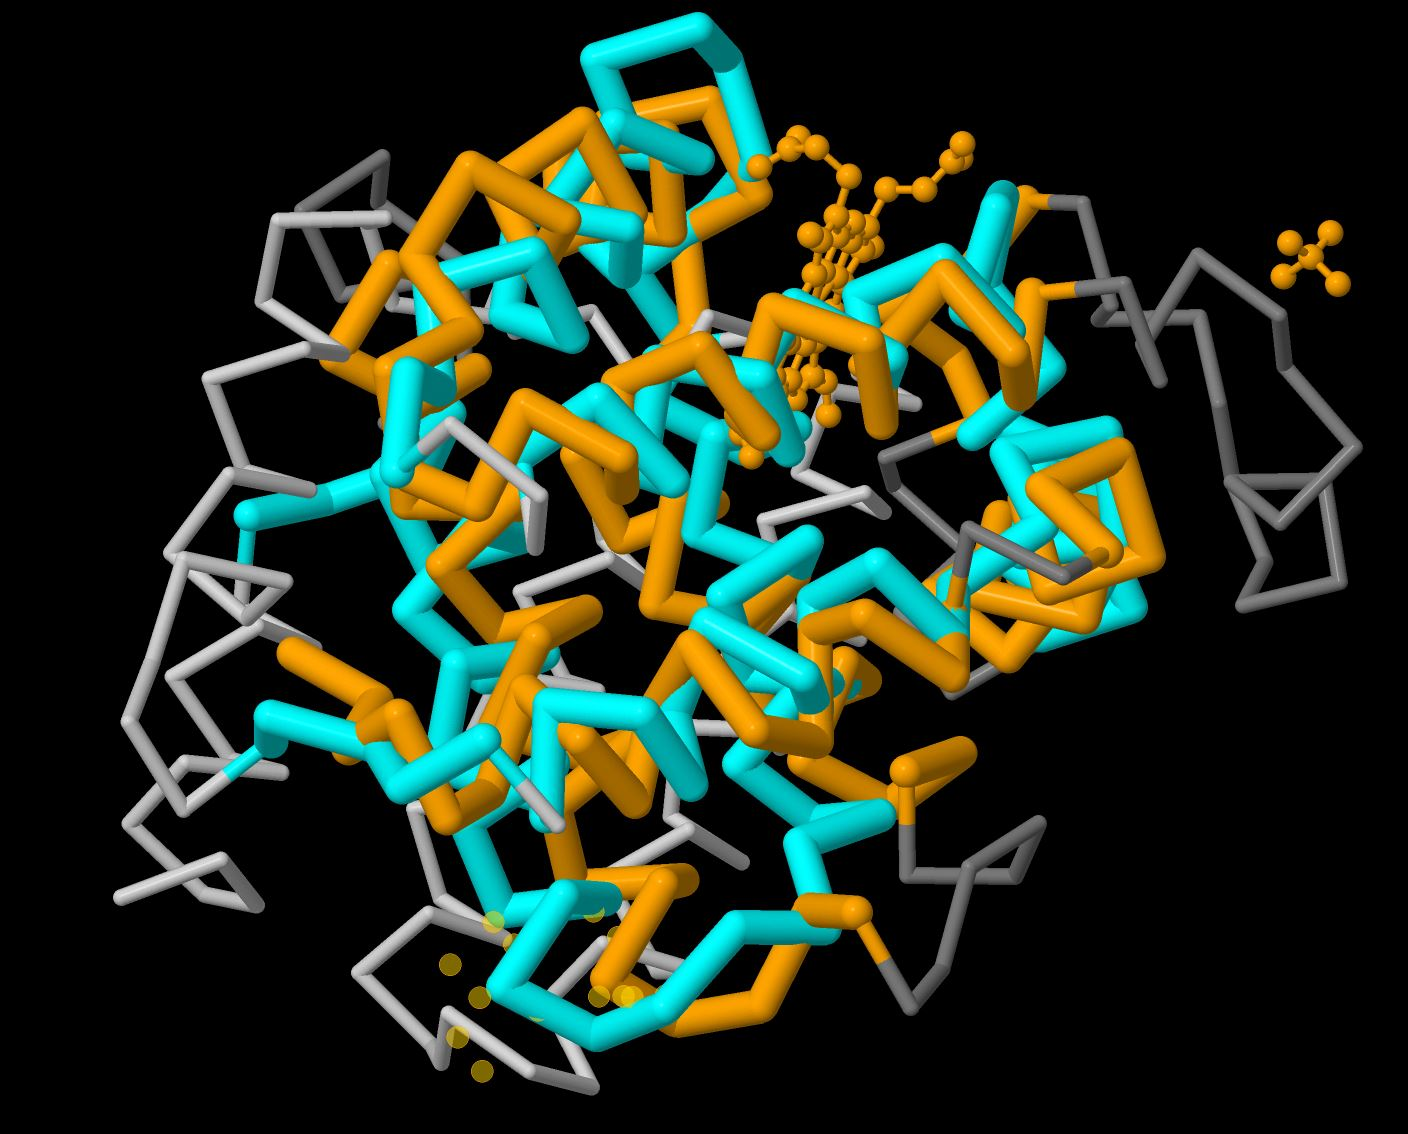

In [9]:
Image('4-c.jpg', width=400)

#### To do the sequence alignment:

-	Go to the PDB website: http://www.rcsb.org/pdb/home/home.do  
-	Select the “Analyze” and then the “Sequence & Structure Alignment” Menu as shown in the figure. 
-	Type in the two PDB ids in the corresponding windows, then select “Needleman-Wunsch” in the “Select Comparison Method” menu. Press Align. 


#### To do the structure alignment, 
-	Same as above, but change the “Select Comparison Method” menu to  “jFATCAT rigid”. 
-	If PDB server does not work, use alternative server http://fatcat.godziklab.org/fatcat/fatcat_pair.html 

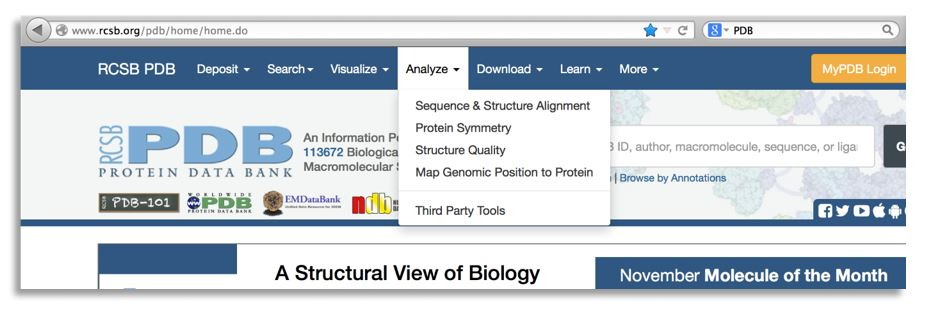

In [10]:
Image('img3.jpg', width=500)

<hr>

## 5)	Sequence alignment and dynamic programming (25 pts) 

Perform global alignment between the two DNA sequences GATTAC and ATTGAC using dynamic programming.

### a)	Build an alignment matrix and determine the score of the optimal alignment.  

In [11]:
def getMatch(x: 'char', y: 'char', match_score: int, penalty_mismatch: int):
    """
    compares x and y and returns correct score depending on match or mismatch
    """
    if x == y:
        return match_score
    else:
        return penalty_mismatch

In [12]:
def fillM(X: str, Y: str, match_score: int, penalty_mismatch: int, penalty_gap: int):
    # create empty memoization matrix of size |X|+1 x |Y|+1
    M = np.empty((len(Y)+1,len(X)+1), dtype='int64')
    # initialze matrix with necessary default values
    for i in range(len(X)+1):
        M[0,i] = i * penalty_gap
    for j in range(len(Y)+1):
        M[j,0] = j* penalty_gap
    # fill in array
    # j => jth row, i => ith column
    for j in range(1, len(Y)+1):
        for i in range(1, len(X)+1):
            match = M[j-1,i-1] + getMatch(X[i-1], Y[j-1], match_score, penalty_mismatch)
            y_gap = M[j-1,i] + penalty_gap
            x_gap = M[j,i-1] + penalty_gap
            M[j,i] = max(match, y_gap, x_gap)
    return M

In [13]:
match = 1
mismatch = -3
gap = -2
M = fillM('GATTAC', 'ATTGAC', match, mismatch, gap)
print(M)

[[  0  -2  -4  -6  -8 -10 -12]
 [ -2  -3  -1  -3  -5  -7  -9]
 [ -4  -5  -3   0  -2  -4  -6]
 [ -6  -7  -5  -2   1  -1  -3]
 [ -8  -5  -7  -4  -1  -2  -4]
 [-10  -7  -4  -6  -3   0  -2]
 [-12  -9  -6  -7  -5  -2   1]]


In [14]:
print(M[-1,-1])

1


### b)	Indicate the path of the optimal alignment in the alignment matrix. 

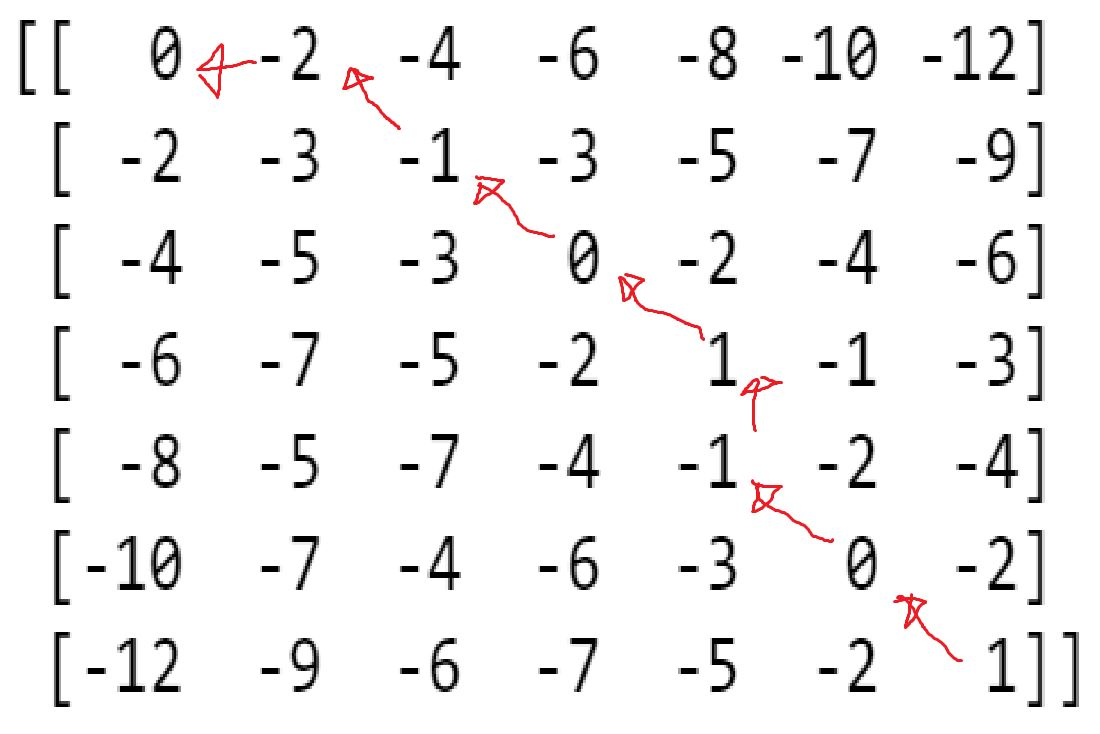

In [15]:
Image('5-b.jpg', width=400)

### c)	Write out the resulting optimal alignment.  

In [16]:
def findAlign(X: str, Y: str, M: 'numpy.ndarray', match_score: int, penalty_mismatch: int, penalty_gap: int):
    xlen = M.shape[1]
    ylen = M.shape[0]
    
    X = '_' + X
    Y = '_' + Y
    X_align = ''
    Y_align = ''
    opt_row = ylen-1
    opt_col = xlen-1
    
    if xlen == 1:
        return X_align, Y[1:]
    if ylen == 1:
        return X[1:], Y_align
    
    for row in range(ylen-1, -1, -1):
        for col in range(xlen-1, -1, -1):
            if opt_row == 0 and opt_col == 0:
                break
            if opt_row != row or opt_col != col:
                continue
            if M[row, col] == M[row-1, col-1] + getMatch(X[col], Y[row], match_score, penalty_mismatch):
                X_align += X[col]
                Y_align += Y[row]
                opt_row = row-1
                opt_col = col-1
            elif M[row, col] == M[row-1, col] + penalty_gap:
                X_align += '_'
                Y_align += Y[row]
                opt_row = row-1
            elif M[row, col] == M[row, col-1] + penalty_gap:
                X_align += X[col]
                Y_align += '_'
                opt_col = col-1
    return X_align[::-1], Y_align[::-1]

In [17]:
print(findAlign('GATTAC', 'ATTGAC', M, match, mismatch, gap))

('GATT_AC', '_ATTGAC')


#### Use the following scoring system, as in the example below: 
The score for a match between two letters i and j: $Sij = +1$ if $i = j$

The score for a mismatch between two letters i and j: $Sij = -3$ if $i ≠ j$

The introduction of a gap is scored as: $S_{(i,--)} = -2$ and $S_{(--,j)}  = -2$


<hr>

## 6) Prediction of fold and alignment for a new protein (25 pts)

Your colleagues identified and sequenced a new protein (see the sequence below).

Using the fold identification and threading algorithm MUSTER (MUlti-Sources ThreadER) (https://zhanglab.ccmb.med.umich.edu/MUSTER/), which make predictions of 3D structural templates and build models:
1. List the best threading templates, their sequence identities (ID1 and ID2) and Zscores. Follow the links for these templates in PDB. What is a common protein family for the templates? What the GeneOnthology links suggest about the protein function?  
2.	Download the 4 models generated by the algorithm. Load them to Pymol (you have installed it for Part 1 of the course) and superimpose with the align command, e.g. `align model1////CA`, `model2////CA`.  What is RMSD between the model1 and other models? Does it suggest a good quality of the models?


#### Note that MUSTER server can take up to 24 hours to send the result, so submit early before the HW deadline.

```
>NewProtein
MNRHHLQDHFLEIDKKNCCVFRDDFIVKVLPPVLGLEFIFGLLGNGLALWIFCFHLKSWKSSRIFLFNLAVADFLLIICLPFLMDNYVRRWDWKFGDIPCRLMLFMLAMNRQGSIIFLTVVAVDRYFRVVHPHHALNKISNRTAAIISCLLWGITIGLTVHLLKKKMPIQNGGANLCSSFSICHTFQWHEAMFLLEFFLPLGIILFCSARIIWSLRQRQMDRHAKIKRAITFIMVVAIVFVICFLPSVVVRIRIFWLLHTSGTQNCEVYRSVDLAFFITLSFTYMNSMLDPVVYYFSSPSFPNFFSTLINRCLQRKMTGEPDNNRSTSVELTGDPNKTRGAPEALMANSGEPWSPSYLGPTSP
```